In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import sqlite3 as sql

In [ ]:
triplets = pd.read_csv("/content/drive/MyDrive/song_Dataset/10000.txt",sep="\t",names=["user_id","song_id","count"],header=None)

In [ ]:
triplets.head()

,user_id,song_id,count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [ ]:
song_unique_list = triplets["song_id"].unique()
len(song_unique_list)

10000

In [ ]:
len(triplets["song_id"].to_numpy())

2000000

In [ ]:
unique_track = pd.read_csv("/content/drive/MyDrive/song_lyrics/unique_tracks.txt",sep="<SEP>",header=None,names=["track_id","song_id","artist_name","title"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
unique_track.head()

,track_id,song_id,artist_name,title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [ ]:
unique_track = unique_track[unique_track.song_id.isin(song_unique_list)]

In [ ]:
unique_track.head()

,track_id,song_id,artist_name,title
245,TRMMCDR128F423AB03,SOSZNRJ12A8AE46E38,Michael Cera & Ellen Page,Anyone Else But You
412,TRMMFSL128F4234583,SOGKGLB12A81C22AFA,Kanye West / Mos Def,Drunk and Hot Girls
464,TRMMQSP128F1486267,SOWZDNH12A6D4F7237,Story Of The Year,Until The Day I Die (Album Version)
484,TRMMQOL128F9340687,SOQBGZD12AB0184341,Paramore,Rewind (Demo)
548,TRMMZKU128F4296801,SOTPWHK12A8AE46DC8,Rick Astley,Never Knew Love


In [ ]:
unique_track["song_id"].nunique()

10000

In [ ]:
merge_df = triplets.merge(unique_track,how="inner",on="song_id")

In [ ]:
merge_df.head()

,user_id,song_id,count,track_id,artist_name,title
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,TRIQAUQ128F42435AD,Jack Johnson,The Cove
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,TRIQAUQ128F42435AD,Jack Johnson,The Cove


In [ ]:
match_df = pd.read_csv("/content/drive/MyDrive/song_lyrics/mxm_779k_matches.txt",header=None,comment="#",
                       names=["track_id","artist_name","title","mxm_id","mxm_artist","mxm_title"],sep="<SEP>")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [ ]:
match_df = match_df[["track_id","mxm_artist","mxm_title","mxm_id"]]

In [ ]:
match_df.head()

,track_id,mxm_artist,mxm_title,mxm_id
0,TRMMMKD128F425225D,Karkkiautomaatti,Tanssi vaan,4418550.0
1,TRMMMRX128F93187D9,Hudson Mohawke,No One Could Ever,8898149.0
2,TRMMMCH128F425532C,Yerba Brava,Si vos queres,9239868.0
3,TRMMMXN128F42936A5,Franz Berwald,"Symphony No. 1 in G minor ""Sinfonie Sérieuse"":...",5346741.0
4,TRMMMBB12903CB7D21,Kris Kross,2 Da Beat Ch'yall,2511405.0


In [ ]:
match_merge =merge_df.merge(match_df,how="left",on="track_id")

In [ ]:
match_merge.head()

,user_id,song_id,count,track_id,artist_name,title,mxm_artist,mxm_title,mxm_id
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove,Jack Johnson,The Cove,7232629.0
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove,Jack Johnson,The Cove,7232629.0
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,TRIQAUQ128F42435AD,Jack Johnson,The Cove,Jack Johnson,The Cove,7232629.0
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,TRIQAUQ128F42435AD,Jack Johnson,The Cove,Jack Johnson,The Cove,7232629.0
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,TRIQAUQ128F42435AD,Jack Johnson,The Cove,Jack Johnson,The Cove,7232629.0


In [ ]:
len(match_merge["song_id"])

2086946

In [ ]:
match_merge.isna().sum()

user_id            0
song_id            0
count              0
track_id           0
artist_name        0
title              0
mxm_artist     79223
mxm_title      79223
mxm_id         79223
dtype: int64

In [ ]:
match_merge_1 = match_merge[["song_id","track_id","mxm_id"]].drop_duplicates()

In [ ]:
match_merge_1.reset_index(drop=True,inplace=True)

In [ ]:
match_merge_1.to_csv("/content/drive/MyDrive/song_lyrics/match_csv_final.csv")

In [ ]:
match_merge =match_merge[["user_id","track_id","count"]]
match_merge.to_csv("/content/drive/MyDrive/song_lyrics/listening_history.csv")

In [ ]:
match_merge.head()

,user_id,track_id,count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,TRIQAUQ128F42435AD,1
1,7c86176941718984fed11b7c0674ff04c029b480,TRIQAUQ128F42435AD,1
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,TRIQAUQ128F42435AD,3
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,TRIQAUQ128F42435AD,1
4,3f73f44560e822344b0fb7c6b463869743eb9860,TRIQAUQ128F42435AD,6


In [ ]:
match_data = pd.read_csv("/content/drive/MyDrive/song_lyrics/match_csv_final.csv")

In [ ]:
match_data =match_data.loc[:, ~match_data.columns.str.contains('^Unnamed')]
match_data.head()

,song_id,track_id,mxm_id
0,SOAKIMP12A8C130995,TRIQAUQ128F42435AD,7232629.0
1,SOBBMDR12A8C13253B,TRMHBXZ128F4238406,4521308.0
2,SOBXHDL12A81C204C0,TRHNCIR128F42334A5,6445221.0
3,SOBXHDL12A81C204C0,TRUATNS128F423457D,6672281.0
4,SOBYHAJ12A6701BF1D,TRYBNIB128F428E704,4750416.0


In [ ]:
connection = sql.Connection("/content/drive/MyDrive/song_lyrics/DB/track_metadata.db")
meta_data = pd.read_sql_query("select * from songs",con=connection)

In [ ]:
meta_data.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


In [ ]:
meta_data = meta_data[meta_data.track_id.isin(match_data.track_id)].reset_index(drop=True)


In [ ]:
meta_data = meta_data.iloc[:,:-3]
meta_data.head()


,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRMMCDR128F423AB03,Anyone Else But You,SOSZNRJ12A8AE46E38,Juno - Music From The Motion Picture,AR62GN71187B9AAD0C,70fada2a-5b8c-4988-a2d7-79576d7f6daf,Michael Cera & Ellen Page,116.71465,0.540441,0.464981,2007
1,TRMMFSL128F4234583,Drunk and Hot Girls,SOGKGLB12A81C22AFA,Graduation,ARRH63Y1187FB47783,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West / Mos Def,313.28608,0.877214,1.082503,2007
2,TRMMQSP128F1486267,Until The Day I Die (Album Version),SOWZDNH12A6D4F7237,Page Avenue,ARF6ZTO1187FB3684F,e2c3c508-f0ab-49af-92c9-a81d66d67405,Story Of The Year,235.78077,0.806763,0.580095,2003
3,TRMMQOL128F9340687,Rewind (Demo),SOQBGZD12AB0184341,Riot!,AR4OU721187FB4549D,728ea90d-279b-4201-a8c4-597830883150,Paramore,226.95138,0.951488,0.658925,0
4,TRMMZKU128F4296801,Never Knew Love,SOTPWHK12A8AE46DC8,Love Songs,ARWPYQI1187FB4D55A,db92a151-1ac2-438b-bc43-b82e149ddd50,Rick Astley,185.67791,0.754918,0.507464,1991


In [ ]:
meta_data.to_csv("/content/drive/MyDrive/meta_data.csv")

In [ ]:
#Artist
artist_data = pd.read_sql_query("select * from artist_mbtag",con =sql.Connection("/content/drive/MyDrive/song_lyrics/DB/artist_term.db"))


In [ ]:
artist_data.head()

,artist_id,mbtag
0,AR002UA1187B9A637D,uk
1,AR002UA1187B9A637D,rock
2,AR002UA1187B9A637D,garage rock
3,AR006821187FB5192B,bass
4,AR00A6H1187FB5402A,detroit


In [ ]:
connection = sql.Connection("/content/drive/MyDrive/song_lyrics/DB/mxm_dataset.db")
lyrics_data = pd.read_sql_query("select * from lyrics",con=connection)

In [ ]:
lyrics_data = lyrics_data[lyrics_data.track_id.isin(match_data.track_id)].reset_index(drop=True)

In [ ]:
words_data = pd.read_sql_query("select * from words",con=connection)

In [ ]:
lyrics_data.head()

,track_id,mxm_tid,word,count,is_test
0,TRAABJS128F9325C99,5516210,i,5,0
1,TRAABJS128F9325C99,5516210,the,3,0
2,TRAABJS128F9325C99,5516210,you,3,0
3,TRAABJS128F9325C99,5516210,to,3,0
4,TRAABJS128F9325C99,5516210,and,8,0


In [ ]:
words_data.head()

,word
0,i
1,the
2,you
3,to
4,and


In [ ]:
lyrics_data.to_csv("/content/drive/MyDrive/lyrics_data.csv")
words_data.to_csv("/content/drive/MyDrive/words_data.csv")

In [ ]:
lyrics_data = pd.read_csv("/content/drive/MyDrive/lyrics_data.csv")
words_data = pd.read_csv("/content/drive/MyDrive/words_data.csv")

In [ ]:
words_data =words_data.loc[:, ~words_data.columns.str.contains('^Unnamed')]
words_data.head()

,word
0,i
1,the
2,you
3,to
4,and


In [ ]:
lyrics_data =lyrics_data.loc[:, ~lyrics_data.columns.str.contains('^Unnamed')]
lyrics_data.head()

,track_id,mxm_tid,word,count,is_test
0,TRAABJS128F9325C99,5516210,i,5,0
1,TRAABJS128F9325C99,5516210,the,3,0
2,TRAABJS128F9325C99,5516210,you,3,0
3,TRAABJS128F9325C99,5516210,to,3,0
4,TRAABJS128F9325C99,5516210,and,8,0


In [ ]:
lyrics_data['words'] = lyrics_data.apply(lambda x: (x['word']+' ') * x['count'], axis=1)

In [ ]:
merge_data = lyrics_data[['track_id','words']].groupby('track_id')['words'].apply(lambda x: ' '.join(x)).reset_index(name='lyric')

In [ ]:
merge_data.head()

,track_id,lyric
0,TRAABJS128F9325C99,i i i i i the the the you you you to to to ...
1,TRAACIE128F428495B,i i the the you you you you you you you you ...
2,TRAACPH12903CF5F14,the you and and and a in in is your we ...
3,TRAADKW128E079503A,i i i i i i i i i i i i i i i i i i i i i i i ...
4,TRAADQL128F427D281,i i i i i i i i i i i i i i i i i i i i i i i ...


In [ ]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:

def text_cleaning(text):
  # text = re.sub('^<[^>]+>',text, '')
  # print(text)
  lemm =nltk.WordNetLemmatizer()
  stop_words = set(stopwords.words("english"))
  word_tokens = word_tokenize(text)
  # print(word_tokens)
  filtered_text = [word.lower() for word in word_tokens if word not in stop_words]
  # print(filtered_text)
  text = [lemm.lemmatize(word) for word in filtered_text ]
  # print(text)
  text = " ".join(word for word in text)
  return text

In [ ]:
merge_data["lyric"] = merge_data["lyric"].apply(lambda x: text_cleaning(x))

In [ ]:
merge_data.head()

,track_id,lyric
0,TRAABJS128F9325C99,come one one want way say eye tell still still...
1,TRAACIE128F428495B,love love like like come one never let let say...
2,TRAACPH12903CF5F14,come see eye thing live live everyth word much...
3,TRAADKW128E079503A,know like like like like go go get get get get...
4,TRAADQL128F427D281,love know like time go get get get get get get...


In [ ]:
word_cloud_text = " ".join(list(merge_data["lyric"].to_numpy()))

In [ ]:
text_list =[]
word_cloud_text_li = word_cloud_text.split()
for i in word_cloud_text_li:
  if len(i)>1:
    text_list.append(i)


In [ ]:
print("Unique words in lyrics dataset: ",len(np.unique(text_list)))

Unique words in lyrics dataset:  4695


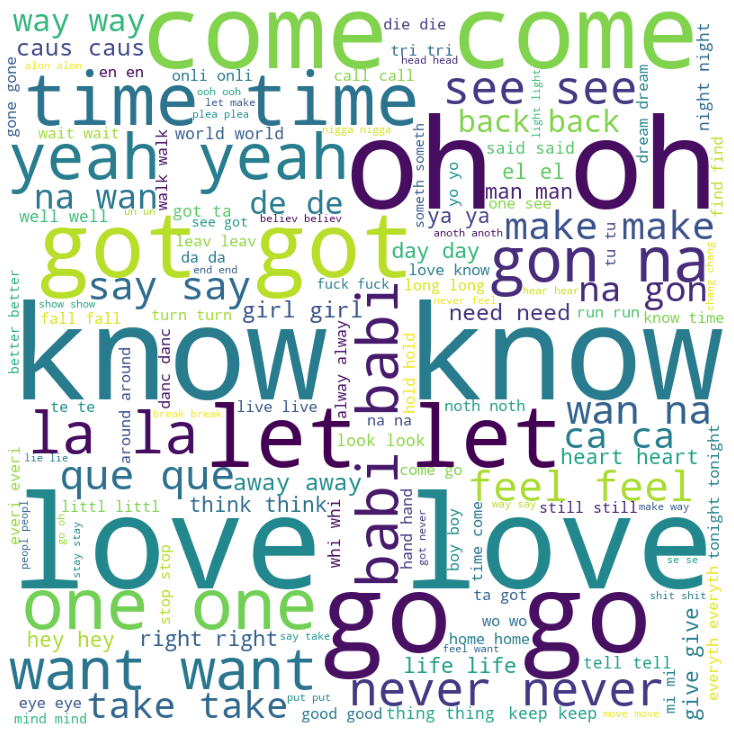

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(word_cloud_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (15,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
from collections import Counter
# line_text = "Learn and practice and learn to practice"
freq = Counter(word_cloud_text.split()).most_common()
# print(freq)

In [ ]:
stop_words_li = list(stopwords.words('english'))
counter = 0
word_list = []
freq_list= []
i = 0
while(counter<20):
  if freq[i][0] not in stop_words_li:
    word_list.append(freq[i][0])
    freq_list.append(freq[i][1])
    counter+=1
    
  i+=1

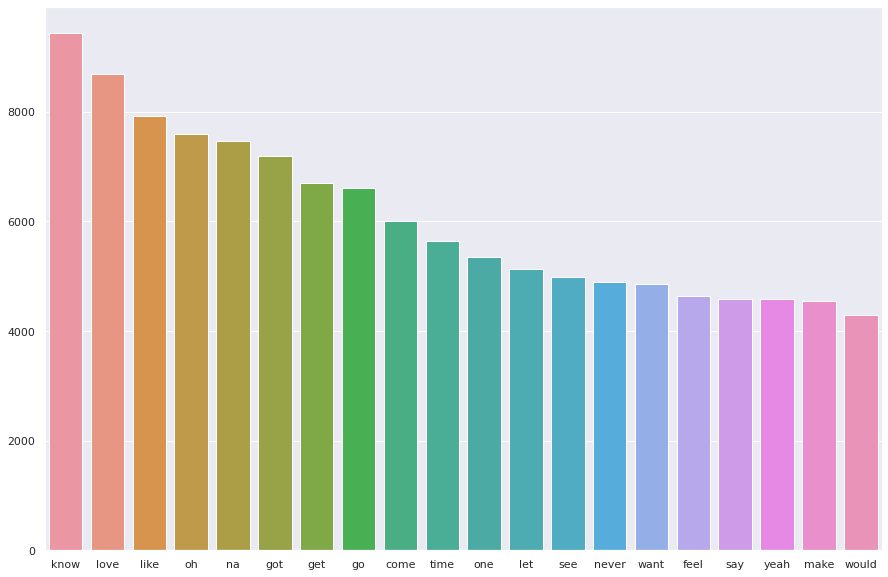

In [ ]:
sns.barplot(y =freq_list, x=word_list )
sns.set(rc={'figure.figsize':(15,10)})

In [ ]:
def text_clean(text):
  porter = nltk.PorterStemmer()
  # print(text)
  text = [w for w in text.split(" ") if w not in stop_words_li]
  text = " ".join(text)
  text = porter.stem(text)
  text = nltk.word_tokenize(text)
  return text

In [ ]:
merge_data["lyric_clean"] = merge_data["lyric"].apply(lambda x:text_clean(x))

In [ ]:
merge_data.head()

,track_id,lyric,lyric_clean
0,TRAABJS128F9325C99,come one one want way say eye tell still still...,"[come, one, one, want, way, say, eye, tell, st..."
1,TRAACIE128F428495B,love love like like come one never let let say...,"[love, love, like, like, come, one, never, let..."
2,TRAACPH12903CF5F14,come see eye thing live live everyth word much...,"[come, see, eye, thing, live, live, everyth, w..."
3,TRAADKW128E079503A,know like like like like go go get get get get...,"[know, like, like, like, like, go, go, get, ge..."
4,TRAADQL128F427D281,love know like time go get get get get get get...,"[love, know, like, time, go, get, get, get, ge..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim import corpora,models
# from gensim import LdaModel,LsiModel 

In [ ]:
tf_idf = TfidfVectorizer()

In [ ]:
tfidf = tf_idf.fit_transform(merge_data["lyric"])

In [ ]:
#word to vector:
word_to_vector = gensim.models.Word2Vec(merge_data["lyric_clean"],min_count=1,size=200,window=1)

In [ ]:
merge_data["lyric_clean"]

0       [come, one, one, want, way, say, eye, tell, st...
1       [love, love, like, like, come, one, never, let...
2       [come, see, eye, thing, live, live, everyth, w...
3       [know, like, like, like, like, go, go, get, ge...
4       [love, know, like, time, go, get, get, get, ge...
                              ...                        
5625    [like, like, like, like, come, come, come, com...
5626    [love, love, love, love, love, love, love, lov...
5627    [love, know, oh, oh, oh, oh, oh, oh, oh, oh, o...
5628    [time, see, see, see, see, see, got, never, fe...
5629    [know, know, know, know, know, know, see, feel...
Name: lyric_clean, Length: 5630, dtype: object

In [ ]:
vocabulary =set(word_to_vector.wv.index2word)
features = []
for t in merge_data["lyric_clean"]:
  feature_vector = np.zeros((200,),dtype="float64")
  word_count = 0
  for w in t:
    if w in vocabulary:
      word_count+=1
      feature_vector =np.add(feature_vector,word_to_vector[w])

  if word_count:
    feature_vector = np.divide(feature_vector,word_count)
  
  features.append(feature_vector)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
features = np.array(features)

In [ ]:
features_df = pd.DataFrame(features)
features_df.to_csv("/content/drive/MyDrive/song_lyrics/features_song_lyrics.csv")

In [ ]:
features_df = pd.read_csv("/content/drive/MyDrive/song_lyrics/features_song_lyrics.csv")

In [ ]:
features_df = features_df.loc[:, ~features_df.columns.str.contains('^Unnamed')]
features_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.196555,0.343103,-0.352295,-0.388369,-0.368954,0.110844,-0.085409,-0.158980,0.366786,0.162443,-0.072762,0.010798,-0.074170,-0.200765,0.157055,0.247745,-0.265222,0.047841,-0.047208,0.028044,0.117418,-0.322395,-0.250627,-0.629540,0.115158,0.376765,-0.370923,0.014681,-0.190798,-0.111064,0.140597,-0.837045,-0.357008,-0.351646,0.325234,-0.082184,-0.020762,0.312953,0.131370,-0.032297,...,-0.568691,-0.246837,-0.066075,0.100351,-0.077602,-0.105268,-0.182374,-0.100716,0.052440,0.384465,-0.192873,0.131239,-0.148678,0.690693,0.235268,-0.218194,0.039723,-0.010714,-0.440417,0.032507,-0.186873,0.050171,-0.197341,-0.100923,-0.044324,-0.358687,-0.237803,0.004023,-0.170138,0.153874,-0.299474,0.146379,0.163751,-0.097349,-0.330435,0.175479,-0.809258,-0.337011,-0.101971,0.044040
1,-0.264757,0.354846,-0.291293,-0.325097,-0.233190,0.029589,-0.024522,-0.151477,0.351190,0.105656,-0.064915,0.037579,-0.091690,-0.193027,0.214352,0.301774,-0.221457,0.125333,-0.023994,-0.014170,0.082333,-0.255891,-0.169244,-0.511731,-0.014672,0.270116,-0.271609,-0.099126,-0.201292,-0.121274,0.187327,-0.730588,-0.334078,-0.355400,0.302613,-0.036231,0.093836,0.291071,0.097311,0.040304,...,-0.510889,-0.184442,-0.035251,0.146603,-0.072249,-0.093282,-0.135176,-0.130061,0.022486,0.374470,-0.106300,0.127814,-0.125796,0.617175,0.255991,-0.189075,0.059682,-0.107651,-0.425954,0.009907,-0.113338,0.092415,-0.224710,-0.084104,-0.056115,-0.294925,-0.203995,0.077128,-0.178490,0.124087,-0.205765,0.138519,0.159488,-0.022402,-0.271994,0.199594,-0.690261,-0.381600,-0.067997,0.054645
2,-0.262135,0.429103,-0.284526,-0.277438,-0.248846,0.059639,-0.089384,-0.131281,0.373911,0.126816,-0.046687,0.164165,-0.065195,-0.327486,0.242909,0.257258,-0.262766,0.201123,-0.020064,-0.008006,0.106567,-0.333292,-0.144166,-0.581164,0.003854,0.330714,-0.300786,-0.057308,-0.137211,-0.019000,0.104997,-0.853831,-0.474268,-0.343551,0.397103,-0.127345,0.003860,0.374877,0.080695,-0.053961,...,-0.665333,-0.235360,-0.217328,0.142439,-0.091504,-0.113457,-0.122098,-0.111773,0.009092,0.416337,-0.021837,0.055477,-0.153021,0.627201,0.254125,-0.160243,-0.040985,-0.110453,-0.460085,0.065061,-0.106225,0.105321,-0.119222,-0.009211,-0.022930,-0.311445,-0.338179,0.063238,-0.279263,0.085416,-0.256850,0.231763,0.160602,-0.012991,-0.358408,0.184167,-0.754938,-0.419013,-0.220291,0.103598
3,-0.222074,0.330368,-0.287868,-0.459541,-0.359536,0.129076,-0.056646,-0.143158,0.487084,0.077284,-0.074747,0.001126,-0.132673,-0.284194,0.247724,0.308690,-0.377937,0.078601,-0.057872,0.006571,0.197901,-0.398933,-0.238684,-0.632909,0.101987,0.366954,-0.403036,0.004739,-0.267103,-0.130558,0.202722,-0.953598,-0.416645,-0.397202,0.338021,-0.062166,0.010658,0.410462,0.140762,0.081925,...,-0.690382,-0.242650,-0.042234,0.228239,-0.123724,-0.091602,-0.212775,-0.109267,0.050784,0.546363,-0.189192,0.195755,-0.173104,0.894149,0.300449,-0.323192,0.154791,-0.091097,-0.482935,-0.055391,-0.226331,0.161686,-0.173139,-0.008669,-0.098666,-0.367850,-0.191064,0.049929,-0.197830,0.119763,-0.284396,0.190208,0.136454,-0.026301,-0.317523,0.213149,-0.829487,-0.489344,-0.037407,0.012791
4,-0.223407,0.388742,-0.145712,-0.393470,-0.601727,0.106788,-0.117825,-0.145363,0.495194,0.014818,-0.037090,0.079001,-0.306078,-0.117699,0.313208,0.405261,-0.403618,0.122336,-0.079414,-0.017310,0.364429,-0.439091,-0.135918,-0.738124,0.339113,0.234953,-0.487825,-0.125515,-0.187852,-0.239070,0.048228,-0.926044,-0.424977,-0.277568,0.365640,-0.124350,-0.138388,0.462940,0.257475,-0.134877,...,-0.672906,-0.194670,-0.423605,0.313231,-0.277776,-0.117384,-0.304912,-0.194851,0.251215,0.449598,-0.129744,0.165678,-0.163208,0.700296,0.313414,-0.283044,0.056164,-0.006292,-0.458050,-0.174465,-0.208268,0.217523,-0.026555,-0.183763,-0.1

In [ ]:
features_df.shape

(5630, 201)

In [ ]:
#Topic modelling
word_corpus = corpora.Dictionary(merge_data["lyric_clean"])

In [ ]:
sorted_word = sorted(word_corpus.items(),key=lambda i:i[0], reverse = False)
unique_token = [token for (ID,token) in sorted_word]

In [ ]:
merge_data["vector"] =[word_corpus.doc2bow(tokens) for tokens in merge_data["lyric_clean"]]

In [ ]:
merge_data.head()

,track_id,lyric,lyric_clean,vector
0,TRAABJS128F9325C99,come one one want way say eye tell still still...,"[come, one, one, want, way, say, eye, tell, st...","[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1..."
1,TRAACIE128F428495B,love love like like come one never let let say...,"[love, love, like, like, come, one, never, let...","[(1, 1), (14, 1), (19, 2), (33, 1), (34, 1), (..."
2,TRAACPH12903CF5F14,come see eye thing live live everyth word much...,"[come, see, eye, thing, live, live, everyth, w...","[(1, 1), (2, 1), (72, 1), (105, 2), (106, 1), ..."
3,TRAADKW128E079503A,know like like like like go go get get get get...,"[know, like, like, like, like, go, go, get, ge...","[(11, 3), (17, 1), (19, 2), (21, 1), (27, 2), ..."
4,TRAADQL128F427D281,love know like time go get get get get get get...,"[love, know, like, time, go, get, get, get, ge...","[(0, 1), (19, 1), (27, 1), (38, 1), (68, 1), (..."


In [ ]:
word_matrix = gensim.matutils.corpus2dense(merge_data['vector'], num_terms=len(word_corpus), dtype = 'int')

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [ ]:
lyrics_merge = pd.concat([merge_data,pd.DataFrame(word_matrix.T)], axis=1)

In [ ]:
lyrics_merge.head()

,track_id,lyric,lyric_clean,vector,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007
0,TRAABJS128F9325C99,come one one want way say eye tell still still...,"[come, one, one, want, way, say, eye, tell, st...","[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1...",1,1,1,3,1,1,2,2,3,1,1,2,2,1,2,2,2,1,2,1,1,2,2,3,1,2,2,1,1,1,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TRAACIE128F428495B,love love like like come one never let let say...,"[love, love, like, like, come, one, never, let...","[(1, 1), (14, 1), (19, 2), (33, 1), (34, 1), (...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TRAACPH12903CF5F14,come see eye thing live live everyth word much...,"[come, see, eye, thing, live, live, everyth, w...","[(1, 1), (2, 1), (72, 1), (105, 2), (106, 1), ...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TRAADKW128E079503A,know like like like like go go get get get get...,"[know, like, like, like, like, go, go, get, ge...","[(11, 3), (17, 1), (19, 2), (21, 1), (27, 2), ...",0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,2,0,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TRAADQL128F427D281,love know like time go get get get get get get...,"[love, know, like, time, go, get, get, get, ge...","[(0, 1), (19, 1), (27, 1), (38, 1), (68, 1), (...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
lda_model = models.LdaModel(lyrics_merge["vector"], id2word=word_corpus, num_topics=100) 

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
corpus_lda = lda_model[lyrics_merge['vector']]
lyrics_merge = pd.concat([lyrics_merge,pd.DataFrame(U_matrix)], axis=1)


/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [ ]:
 lyrics_merge.head()

,track_id,lyric,lyric_clean,vector,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,TRAABJS128F9325C99,come one one want way say eye tell still still...,"[come, one, one, want, way, say, eye, tell, st...","[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1...",1,1,1,3,1,1,2,2,3,1,1,2,2,1,2,2,2,1,2,1,1,2,2,3,1,2,2,1,1,1,4,1,1,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.722442,0.000000,0.174383,0.065537,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.020183,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAACIE128F428495B,love love like like come one never let let say...,"[love, love, like, like, come, one, never, let...","[(1, 1), (14, 1), (19, 2), (33, 1), (34, 1), (...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,0.044391,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.051139,0.0,0.011771,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.029553,0.0,0.000000,0.075841,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,TRAACPH12903CF5F14,come see eye thing live live everyth word much...,"[come, see, eye, thing, live, live, everyth, w...","[(1, 1), (2, 1), (72, 1), (105, 2), (106, 1), ...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAADKW128E079503A,know like like like like go go get get get get...,"[know, like, like, like, like, go, go, get, ge...","[(11, 3), (17, 1), (19, 2), (21, 1), (27, 2), ...",0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,2,0,3,0,0,0,0,0,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.108292,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.127909,0.246825,0.0,0.0,0.0,0.0,0.0,0.0,0.037122,0.0,0.000000,0.0,0.019379,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAADQL128F427D281,love know like time go get get get get get get...,"[love, know, like, time, go, get, get, get, ge...","[(0, 1), (19, 1), (27, 1), (38, 1), (68, 1), (...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.059225,0.0,0.0,0.000000,0.074141,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
topics = pd.DataFrame(U_matrix)
features_df = pd.read_csv("/content/drive/MyDrive/song_lyrics/features_song_lyrics.csv")

In [ ]:
U_matrix.T.shape

(100, 5630)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_tfidf = cosine_similarity(tfidf)

In [ ]:
similarity_wordToVector = cosine_similarity(features_df.to_numpy())

In [ ]:
similarity_lda = cosine_similarity(topics.to_numpy())

In [ ]:
index_li = pd.Series(merge_data['track_id'])

In [ ]:
index_li[:5]

0    TRAABJS128F9325C99
1    TRAACIE128F428495B
2    TRAACPH12903CF5F14
3    TRAADKW128E079503A
4    TRAADQL128F427D281
Name: track_id, dtype: object

In [ ]:
meta_data =pd.read_csv("/content/drive/MyDrive/meta_data.csv")

In [ ]:
def recommend_id(track_id, cosine_sim):
    if len(index_li[index_li == track_id]) != 0:
        idx = index_li[index_li == track_id].index[0]
        # print(idx)
        global score_series
        score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
        # print(score_series)
        top10_indexes = list(score_series.iloc[1:11].index)

        recommend_trackid = merge_data.iloc[top10_indexes][['track_id']]
        recommend_track = recommend_trackid.merge(meta_data[['track_id', 'artist_name', 'title']], how='inner', on='track_id')[['artist_name', 'title']]
    else:
        recommend_track = pd.DataFrame()
    return recommend_track

def recommend_title(title, artist, cosine_sim):
    similar_artist = {}
    recommended = pd.DataFrame()
    # try:
    track_input = meta_data.loc[meta_data['title']==title].loc[meta_data['artist_name']==artist, ['track_id', 'artist_id']].reset_index(drop=True)
    # print("hi")
    # print(track_input)
    tid = track_input['track_id'][0] 
    # print("tid")
    aid = track_input['artist_id'][0]
    # print("hi")
    recommended = recommended.append(meta_data.loc[meta_data['track_id']==tid, ['artist_name', 'title']])
    # print(recommended)
    recommended = recommended.append(recommend_id(tid, cosine_sim))
    # print("after function call")
    return recommended.reset_index(drop=True)
    # except:
    #   print("Match error, no song found")
    #   return pd.DataFrame

In [ ]:
#Recommendation using LDA
recommend_title("Anyone Else But You","Michael Cera & Ellen Page",similarity_lda)

,artist_name,title
0,Michael Cera & Ellen Page,Anyone Else But You
1,The Moldy Peaches,Anyone Else But You
2,Suspekt,Kinky Fætter
3,Blur,For Tomorrow
4,Goldfrapp,Ooh La La
5,Mae,Communication
6,A Day To Remember,If It Means A Lot To You
7,Blur,This Is A Low
8,Nirvana,Breed
9,The Grass Roots,Let's Live For Today


In [ ]:
#Recommendation using tfidf
recommend_title("Anyone Else But You","Michael Cera & Ellen Page",similarity_tfidf)

,artist_name,title
0,Michael Cera & Ellen Page,Anyone Else But You
1,The Moldy Peaches,Anyone Else But You
2,Gene Kelly,Singing in the Rain
3,Markus Krunegård,Genom tunna tyger
4,Alexi Murdoch,Love You More
5,Rammstein,Du Riechst So Gut
6,Suspekt,Kinky Fætter
7,Hot Chip,Look After Me
8,Rammstein,Tier
9,The Killers,Romeo And Juliet


In [ ]:
#recommendations using word to Vector
recommend_title("Anyone Else But You","Michael Cera & Ellen Page",similarity_wordToVector)

,artist_name,title
0,Michael Cera & Ellen Page,Anyone Else But You
1,The Moldy Peaches,Anyone Else But You
2,Beyonce,Daddy
3,NEEDTOBREATHE,Shine On (Album Version)
4,Hot Chip,Playboy
5,Jason Mraz,You And I Both (LP Version)
6,Mike Jones,Mr. Jones (Explicit Version)
7,Owl City,Tidal Wave
8,Vampire Weekend,M79 (Album)
9,Bright Eyes,First Day Of My Life (Single Version)
